<a href="https://colab.research.google.com/github/Vethan123/mlproject/blob/main/murthy_sir_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import bisect
from collections import OrderedDict
import seaborn as sns
%matplotlib inline

In [ ]:
#Let p1 be point -> [x1,y1]
#Let p2 be point -> [x2,y2]
def distance_between_two_points(p1,p2):
  return ((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)**0.5


In [ ]:
#this function takes array and target element as input and returns index of element which is greater than previous one
def search(arr, target):
  arr1 = sorted(arr)
  pos = bisect.bisect_right(arr1, target)
  if pos==len(arr1):
    return target
  else:
    return arr1[pos]

In [ ]:
# This function calculates outlier range of an array using IQR values
# This returns a 1d array of lower boundary and upper boundary
def outlier_range(array):
  q1 = np.percentile(array,25)
  q3 = np.percentile(array,75)

  IQR = q3 - q1

  lower_bound = q1 - (1.5*IQR)
  upper_bound = q1 + (1.5*IQR)

  return [lower_bound,upper_bound]

In [ ]:
#points array should be 2d that is in format of [[x,y],[a,b]...]
#centroid array should be 1d
#if some set of points are mapped to a centroid point then this process will be easy
#let dic = {0 : [[p1,p2],[p3,p4]] , 1 : [[p5,p6],[p7,p8]] , ....}
#let centroids array be [[c1,c2],[c3,c4],....]
#returned array will be nested list

def distance_from_centroid(dic,centroid):
  distances = []
  for i in dic.keys():
    temparr=[]
    for j in dic[i]:
      temparr.append(distance_between_two_points(j,centroid[i]))
    distances.append(temparr)
  return distances

In [ ]:
#distances array should be 2d -> [[distances array of cluster 1],[distances array of cluster 2]....]
def mean(distances):
  mean_of_distances=[]
  for i in distances:
    l = len(i)
    s = sum(i)

    mean = s/l
    mean_of_distances.append(mean)
  return mean_of_distances

In [ ]:
#(standard deviation)^2 = sum((occurences - mean)*(occurences-mean))/total number of ocurences
def standard_deviation(distances,mean_of_distances):
  ind = 0
  stddev=[]
  for i in distances:
    temp = 0
    for j in i:
      sq = (mean_of_distances[ind] - j)**2
      temp+=sq
    ind += 1
    stddev.append((temp/len(i))**0.5)
    temp = 0
  return stddev

In [ ]:
#this returns treshhold values of all clusters
def treshhold(stddev,mean_of_distances):
  # ran = random.uniform(0,1)
  ran = 0.5
  tresh = []

  for i,j in zip(mean_of_distances,stddev):
    temp = i + (ran * j)
    tresh.append(temp)
  return tresh

In [ ]:
#In this we take parameters as distances array from distances_from_centroid function
#Another parameter is tresh 1d array from treshhold function
#this function returns avg cutoff distance of each cluster
def avg_cutoff_distance(distances,tresh):
  avg_co = {}
  cn = 0
  for i,j in zip(distances,tresh):
    temparr = [k for k in i if k<=j]
    s = sum(temparr)
    l = len(temparr)
    temp = s/l
    avg_co[cn] = temp
    cn+=1
  return avg_co

In [ ]:
#this function returns local density of a point
#this function takes point, dictionary of points denoting clusters,avg cutoff distance of that cluster
#this returns local densities array

def local_density(dic,avg_co,ind):
  temp = []
  maxi = 0
  for i in dic[ind]:
    cn = 0
    for j in dic[ind]:
      d = distance_between_two_points(i,j)
      maxi = max(d,maxi)
      if d < avg_co[ind]:
        cn+=1
    temp.append(cn)
  temp.append(maxi)
  return temp

In [ ]:
#this function takes arguments as local_density of points, clusters, maxi array.
def closest_distance_to_the_highest_density_points(local_densities,clusters,maxi,i):

  arr_of_req=[]
  for j in range(len(clusters[i])):

    req_element = search(local_densities[i],local_densities[i][j])
    req_index = local_densities[i].index(req_element)

    temp =  distance_between_two_points(clusters[i][j],clusters[i][req_index])

    if temp==0:
      arr_of_req.append(maxi[i])
    else:
      arr_of_req.append(temp)

  return arr_of_req

In [ ]:
# this function takes keys of clusters dictionary,local density array, closest distance array
# this function returns a dictionary conataining all clusters and their valuesas a 2d array of [[local_density,closest_distance]....]
def ordered_pairs(clusters_keys,local_density,closest_distance):
  pairs = OrderedDict()

  for i in clusters_keys:
    for j,k in zip(local_density[i],closest_distance[i]):
      if i not in pairs.keys():
        pairs[i] = [[j,k]]
      else:
        pairs[i].append([j,k])
  return pairs

In [ ]:
# This function takes inputs as merge_pop array,local_densities 2d array,closest_distance_points 2d array
def outlier_selection_strategy_1(Merge_POP,local_Densities,closest_distance_points):
  final = []
  for i in Merge_POP:
    var = local_Densities[i[0]][i[1]]/closest_distance_points[i[0]][i[1]]
    final.append(var)
  return final

In [ ]:
# this function takes input as :
# merge_pop = probable outliers 2d array of format => [[cluster number,index of point in main clusters array]...]
# local_densities = local densities 2d array
# closest_distance_points = 2d array of relative distances
# std_dev,mean = 2d arrays of standard deviation and mean

# this returns final 1d array of odf factors


from math import exp,pi
def outlier_selection_strategy_2(merge_pop,local_densities,closest_distance_points,std_dev,mean):
  final = []
  for i in merge_pop:
    var = (local_densities[i[0]][i[1]] - mean[i[0]])**2
    var /= (2*(std_dev[i[0]]**2))
    var *= -1

    var_new = exp(var)
    denom = (2*pi*(std_dev[i[0]]**2))
    func = var_new/denom

    odf = closest_distance_points[i[0]][i[1]]*func

    final.append(odf)
  return final



# **Prerequisites before entering into orginal process**


In [ ]:
# Here mention name of dataset else mention its location to read it
df = pd.read_csv("/content/Sat_train.csv")

In [ ]:
#This step indicates conversion of df from csv file to dataframe
df = pd.DataFrame(df)

In [ ]:
# checking of null values
df.isnull().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
P        0
Q        0
R        0
S        0
T        0
U        0
V        0
W        0
X        0
Y        0
Z        0
AA       0
AB       0
AC       0
AD       0
AE       0
AF       0
AG       0
AH       0
AI       0
AJ       0
label    0
dtype: int64

In [ ]:
# checking datatypes using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4435 non-null   int64
 1   B       4435 non-null   int64
 2   C       4435 non-null   int64
 3   D       4435 non-null   int64
 4   E       4435 non-null   int64
 5   F       4435 non-null   int64
 6   G       4435 non-null   int64
 7   H       4435 non-null   int64
 8   I       4435 non-null   int64
 9   J       4435 non-null   int64
 10  K       4435 non-null   int64
 11  L       4435 non-null   int64
 12  M       4435 non-null   int64
 13  N       4435 non-null   int64
 14  O       4435 non-null   int64
 15  P       4435 non-null   int64
 16  Q       4435 non-null   int64
 17  R       4435 non-null   int64
 18  S       4435 non-null   int64
 19  T       4435 non-null   int64
 20  U       4435 non-null   int64
 21  V       4435 non-null   int64
 22  W       4435 non-null   int64
 23  X       4435 

In [ ]:
# Forming new dataframe using given data frames
dfnew1 = list(df['A'][:1000])
dfnew2 = list(df['label'][:1000])

dfnew = []

for i,j in zip(dfnew1,dfnew2):
  dfnew.append([i,j])


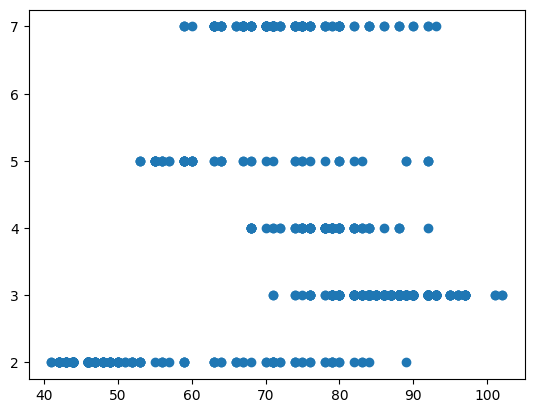

In [ ]:
5#from our dataset contating 19613 rows and 18 columns we take only 100 rows
plt.scatter(df['A'][:1000],df['label'][:1000])
plt.show()

In [ ]:
# This snippet tries all clusters and gives us best fit
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dfnew)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

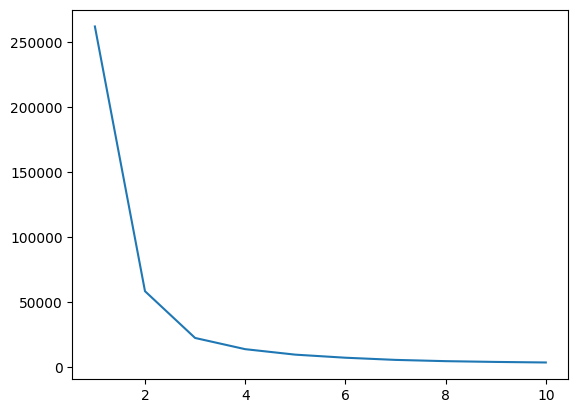

In [ ]:
# plotting graph to see elbow curve

plt.plot(range(1,11),wcss)
plt.show()

In [ ]:
# from above we can say that no. of clusters should be 3
# In this step we will store them

df1 = np.array(dfnew)
kmeans = KMeans(n_clusters=3).fit(df1)

temp_clusters = OrderedDict()
for i, label in enumerate(kmeans.labels_):
    if label not in temp_clusters:
        temp_clusters[label] = []
    else:
      temp = list(df1[i])
      temp_clusters[label].append(temp)

clusters = OrderedDict()

for i in sorted(temp_clusters.keys()):
  clusters[i] = temp_clusters[i]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


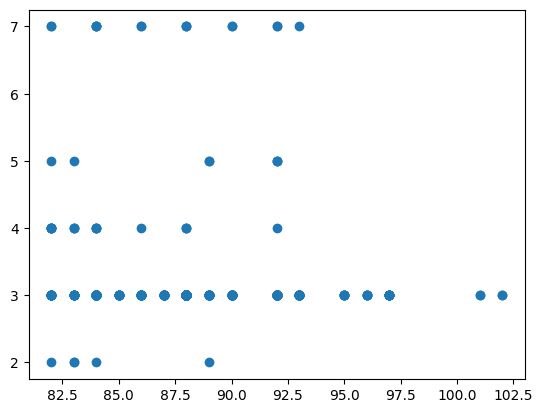

In [ ]:
# plotting of cluster - 0
plt.scatter([i[0] for i in clusters[0]],[i[1] for i in clusters[0]])

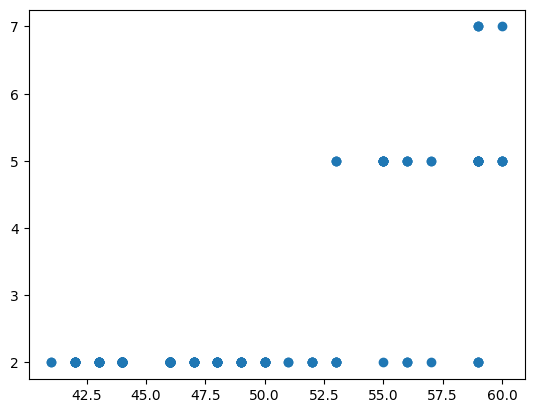

In [ ]:
# plotting of cluster - 1
plt.scatter([i[0] for i in clusters[1]],[i[1] for i in clusters[1]])

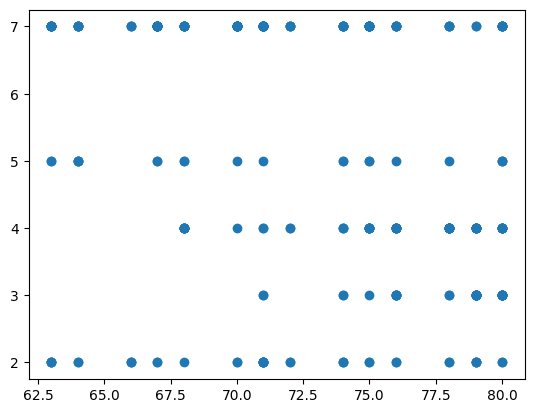

In [ ]:
# .plotting of cluster - 2
plt.scatter([i[0] for i in clusters[2]],[i[1] for i in clusters[2]])


# This is Main() Function

In [ ]:
#step 1 : get centroid of clusters for this we can use bruteforce

centroid = np.array(kmeans.cluster_centers_)



In [ ]:
#step 2 : calculate distances from centroid and store it in distances array

distances = distance_from_centroid(clusters,centroid)

In [ ]:
#step 3 : calculate mean of distances

avg_distances = mean(distances)

In [ ]:
#step 4 : calculate standard deviation of distances

std_dev = standard_deviation(distances,avg_distances)

In [ ]:
#step 5 : calculate tresh hold values from mean and standard deviation

tresh = treshhold(std_dev,avg_distances)

In [ ]:
#step 6 : calculate average cutoff distance

avg_cd = avg_cutoff_distance(distances,tresh)


In [ ]:
# step 7 : calculate local_density and max distance of each cluster

max_values = []
local_densities=[]
for i in clusters.keys():
  temp = local_density(clusters,avg_cd,i)
  m = temp[-1]
  temp.pop(-1)
  local_densities.append(temp)
  max_values.append(m)




In [ ]:
# step 8 : calculating closest distance to highest density points for each point
closest_distance = []

for i in clusters.keys():
  temp = closest_distance_to_the_highest_density_points(local_densities,clusters,max_values,i)
  closest_distance.append(temp)


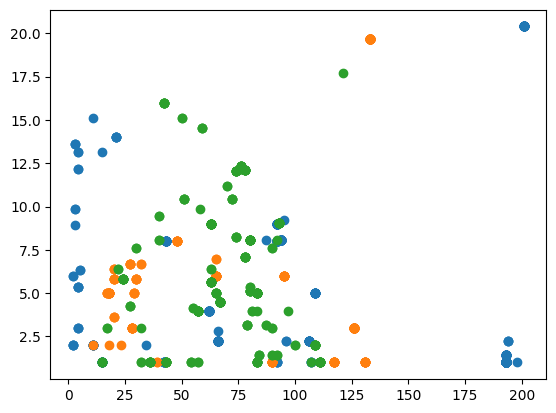

In [ ]:
# step 9 : plotting points with closest_distance on x axis and local_densities on y axis

for i in clusters.keys():
  plt.scatter(local_densities[i], closest_distance[i])


In [ ]:
# step 10 : Merge_POP array selection from all points

pairs = ordered_pairs(clusters.keys(),local_densities,closest_distance)

In [ ]:
# this part gives us the lower and upper boundary of each and every cluster using IQR
local_density_range = []
closest_distance_range = []
for i in clusters.keys():
  local_density_range.append(outlier_range(local_densities[i]))
  closest_distance_range.append(outlier_range(closest_distance[i]))


In [ ]:
# this boolean function checks if the pairs lies in our range or not
# this takes input parameters as local_density,closest_distance_range array,pair array

def check(local_density_range,closest_distance_range,keys,pair):
  cn1=0
  cn2=0
  for i in keys:
    if (pair[0] >= local_density_range[i][0] and pair[0]<=local_density_range[i][1]):
      cn1+=1
    if (pair[1])>=closest_distance_range[i][0] and pair[1]<=closest_distance_range[i][1]:
      cn2+=1
  if(cn1==0 or cn2==0):
    return True
  else:
    return False


In [ ]:
# getting outliers from the
points_dict = OrderedDict()

for i in clusters.keys():
  for j in pairs[i]:
    if (check(local_density_range,closest_distance_range,clusters.keys(),j)):
      temp = pairs[i].index(j)
      val = clusters[i][temp]
      if i not in points_dict:
        points_dict[i] = [val]
      else:
        points_dict[i].append(val)



In [ ]:
# probable local and global outliers from clusters using IQR
points_dict

OrderedDict([(0,
              [[101, 3],
               [102, 3],
               [102, 3],
               [96, 3],
               [96, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [88, 7],
               [88, 7],
               [96, 3],
               [96, 3],
               [83, 5],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [89, 3],
               [82, 5],
               [88, 7],
               [101, 3],
               [96,

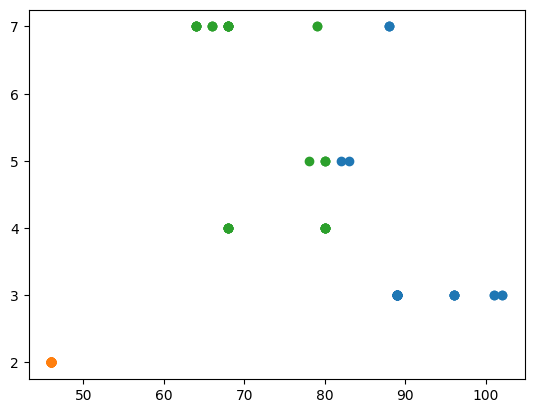

In [ ]:
# plotting of outliers
for i in points_dict.keys():
  plt.scatter([k[0] for k in points_dict[i]],[k[1] for k in points_dict[i]])

In [ ]:
# Storing the probable outliers in merge_pop array
merge_pop = []
for i in points_dict.keys():
  for j in points_dict[i]:
    merge_pop.append([i,clusters[i].index(j)])
merge_pop

[[0, 26],
 [0, 61],
 [0, 61],
 [0, 138],
 [0, 138],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 329],
 [0, 329],
 [0, 138],
 [0, 138],
 [0, 395],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 193],
 [0, 423],
 [0, 329],
 [0, 26],
 [0, 138],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [1, 12],
 [2, 9],
 [2, 9],
 [2, 9],
 [2, 9

In [ ]:
# Step 11 - calculating ODF of points
# Applying outlier selection startegy and calculating odf of all points
odf = outlier_selection_strategy_2(merge_pop,local_densities,closest_distance,std_dev,avg_distances)

In [ ]:
# lets map odf values with merge_pop array

mp = OrderedDict()
for i,j in zip(odf,merge_pop):
  mp[i] = j

In [ ]:
# sorting of odf
odf.sort()

In [ ]:
# From these select top N
print("Total no. of outliers are  : ",len(odf)-1)
N = int(input("Enter no. of outliers u want : "))
if N>=len(odf):
  print("Entered number is more than length of outliers array")
else:
  final_outliers = []

  final_outliers_range =  OrderedDict()

  for i in odf[:N]:
      temp = mp[i]
      final_outliers.append(clusters[temp[0]][temp[1]])
      if mp[i][0] in final_outliers_range.keys():
          final_outliers_range[mp[i][0]].append(clusters[mp[i][0]][mp[i][1]])
      else:
        final_outliers_range[mp[i][0]] = [clusters[mp[i][0]][mp[i][1]]]


  print(final_outliers_range)
  print(len(final_outliers_range[0])+len(final_outliers_range[1])+len(final_outliers_range[2]))

Total no. of outliers are  :  129
Enter no. of outliers u want : 129
OrderedDict([(2, [[78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [78, 5], [68, 7], [68, 7], [68, 7], [68, 7], [68, 7], [68, 7], [68, 7], [68, 7], [80, 5], [80, 5], [80, 5], [80, 4], [80, 4], [80, 4], [80, 4], [80, 4], [80, 4], [80, 4], [68, 4], [68, 4], [68, 4], [68,

KeyError: ignored

# **Verification**

In [ ]:
f = plt.figure(figsize = (15,15))
ax = f.add_subplot(111,projection = '3d')

plt.scatter([i[0] for i in clusters[0]],[i[1] for i in clusters[0]],s = 100)
plt.scatter([i[0] for i in final_outliers],[i[1] for i in final_outliers],s = 100,color = "red")

plt.show()

In [ ]:
f = plt.figure(figsize = (15,15))
ax = f.add_subplot(111,projection = '3d')

plt.scatter([i[0] for i in clusters[1]],[i[1] for i in clusters[1]],s=100)
plt.scatter([i[0] for i in final_outliers_range[1]],[i[1] for i in final_outliers_range[1]],s=100,color = "red")

plt.show()

In [ ]:
f = plt.figure(figsize = (15,15))
ax = f.add_subplot(111,projection = '3d')

plt.scatter([i[0] for i in clusters[2]],[i[1] for i in clusters[2]],s=100)
plt.scatter([i[0] for i in final_outliers_range[2]],[i[1] for i in final_outliers_range[2]],s = 100,color = "red")

plt.show()

In [ ]:
from ctypes import c_int16
from sklearn.neighbors import LocalOutlierFactor
import numpy as np


clf = LocalOutlierFactor(n_neighbors=3,contamination=0.3)
y_pred = clf.fit_predict(dfnew)

outliers_1=[]
for i,j in zip(dfnew,list(y_pred)):
  if j==-1:
    outliers_1.append(i)

tp1 = 0
for i in outliers_1:
  for j in clusters.keys():
    if i in final_outliers_range[j]:
      tp1+=1
      break


In [ ]:
print("Using LocalOutlierFactor Algorithm : \n")
print("True positivity is : ",tp1)